# The Coffee Shop Mystery Part D: Arrive at the Transfer Entropy Viewpoint

## Previously in our Coffee Shop saga...

Our heroes had made progress with instrumental variables and double machine learning, uncovering some of the mystery behind *Café Chaos*'s sales patterns. But something was still missing - the full picture of how everything interacts over time.


## Is the Mystery Close to an End? ...

"I've been thinking," Mira announces, setting up her laptop while Jazz works on his latest latte art masterpiece.

"Uh oh," Max teases. "Last time you said that, you introduced us to something called 'Double Machine Learning.'"

"Oh, this is even better," Mira grins. "We've been looking at relationships as if they're fixed in time, like a recipe. But your café is more like... what's that fancy pour-over thing you do, Jazz?"

"The V60?" Jazz perks up. "Where you have to get the timing just right, and each pour affects the next one?"

"Exactly! What we need is something that can capture those dynamic, time-dependent relationships. Something that understands that today's weather might affect tomorrow's foot traffic, which affects the next day's sales..."

"And you have just the tool?" Max guesses.

"Meet Transfer Entropy - the ultimate weapon in our statistical arsenal!"

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Add the src directory to path for imports
src_dir = os.path.join(os.path.dirname(os.getcwd()), 'src')
sys.path.append(src_dir)

from data_generator import DataGenerator
from causal_analysis import CausalAnalyzer


# Set up our analytical tools
sns.set_style("whitegrid")

# Get our café data and analyzer ready
generator = DataGenerator(seed=42)
data = generator.generate_data(n_days=200, include_hidden=True)
analyzer = CausalAnalyzer()

2025-02-02 20:33:23,590 - causal_analysis - INFO - CausalAnalyzer initialized


# Understanding Transfer Entropy vs. IV and DML

"Alright, before we dive into equations—what makes Transfer Entropy stand out from IV and DML?" Max asks, swirling his coffee.

"Think of it this way," Mira explains. "IV is like a witness—it uses external factors to uncover hidden cause-and-effect. DML is like a translator—it untangles complex relationships. But Transfer Entropy? It's a time traveler. It doesn't just ask what or why—it asks when and how information flows between variables over time."

"So while IV and DML focus on static cause-and-effect, TE tracks motion?" Max leans forward.

"Exactly! IV needs a 'tool' to isolate causation. DML uses algorithms to adjust for confounders. TE doesn't need either. It quantifies uncertainty reduction: 'If I know the past of one variable, how much better can I predict another's future?' It's model-free—no linear equations or hidden variables required."

"But IV and DML also handle directionality, right?"

"Only indirectly. IV relies on external instruments being valid—a big assumption. DML adjusts for confounders but still needs a structural model. TE is more fundamental. It's rooted in information theory—Shannon entropy—so it works for any system, even if relationships are noisy or nonlinear."

"So it's not competing with IV or DML—it's answering a different question?"

"Bingo. They're complementary. Now, ready to see how we implement it?"


Adding data with properties: 5 processes, 200 samples, 1 replications
overwriting existing data

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates


2025-02-02 21:05:41,219 - causal_analysis - INFO - TE from Foot_Traffic to Weather: 0.0345
2025-02-02 21:05:41,219 - causal_analysis - INFO - TE from Social_Media to Weather: 0.0345
2025-02-02 21:05:41,219 - causal_analysis - INFO - TE from Sales to Weather: 0.0345
2025-02-02 21:05:41,219 - causal_analysis - INFO - TE from Competitor to Weather: 0.0345



---------------------------- (3) prune source candidate

---------------------------- (4) final statistics
removing 0 variables after seq. max stats

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates


2025-02-02 21:05:41,575 - causal_analysis - INFO - TE from Weather to Foot_Traffic: 0.6728
2025-02-02 21:05:41,575 - causal_analysis - INFO - TE from Social_Media to Foot_Traffic: 0.6728
2025-02-02 21:05:41,575 - causal_analysis - INFO - TE from Sales to Foot_Traffic: 0.6728
2025-02-02 21:05:41,575 - causal_analysis - INFO - TE from Competitor to Foot_Traffic: 0.6728
2025-02-02 21:05:41,613 - causal_analysis - ERROR - Error analyzing Social_Media: float() argument must be a string or a real number, not 'NoneType'



---------------------------- (3) prune source candidate

---------------------------- (4) final statistics
removing 0 variables after seq. max stats

---------------------------- (1) include target candidates


No informative sources in the target's past - adding target sample with lag 1.

---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics


2025-02-02 21:05:41,802 - causal_analysis - INFO - TE from Weather to Sales: 0.2227



---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics
removing 0 variables after seq. max stats


2025-02-02 21:05:41,802 - causal_analysis - INFO - TE from Foot_Traffic to Sales: 0.2227
2025-02-02 21:05:41,806 - causal_analysis - INFO - TE from Social_Media to Sales: 0.2227
2025-02-02 21:05:41,808 - causal_analysis - INFO - TE from Competitor to Sales: 0.2227
2025-02-02 21:05:41,975 - causal_analysis - INFO - TE from Weather to Competitor: 0.0169
2025-02-02 21:05:41,975 - causal_analysis - INFO - TE from Foot_Traffic to Competitor: 0.0169
2025-02-02 21:05:41,975 - causal_analysis - INFO - TE from Social_Media to Competitor: 0.0169
2025-02-02 21:05:41,975 - causal_analysis - INFO - TE from Sales to Competitor: 0.0169



---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics
removing 0 variables after seq. max stats
Information Flow Analysis:
          Source        Target        TE
4        Weather  Foot_Traffic  0.672763
5   Social_Media  Foot_Traffic  0.672763
6          Sales  Foot_Traffic  0.672763
7     Competitor  Foot_Traffic  0.672763
8        Weather         Sales  0.222730
9   Foot_Traffic         Sales  0.222730
10  Social_Media         Sales  0.222730
11    Competitor         Sales  0.222730
0   Foot_Traffic       Weather  0.034510
1   Social_Media       Weather  0.034510
2          Sales       Weather  0.034510
3     Competitor       Weather  0.034510
12       Weather    Competitor  0.016874
13  Foot_Traffic    Competitor  0.016874
14  Social_Media    Competitor  0.016874
15         Sales    Competitor  0.016874


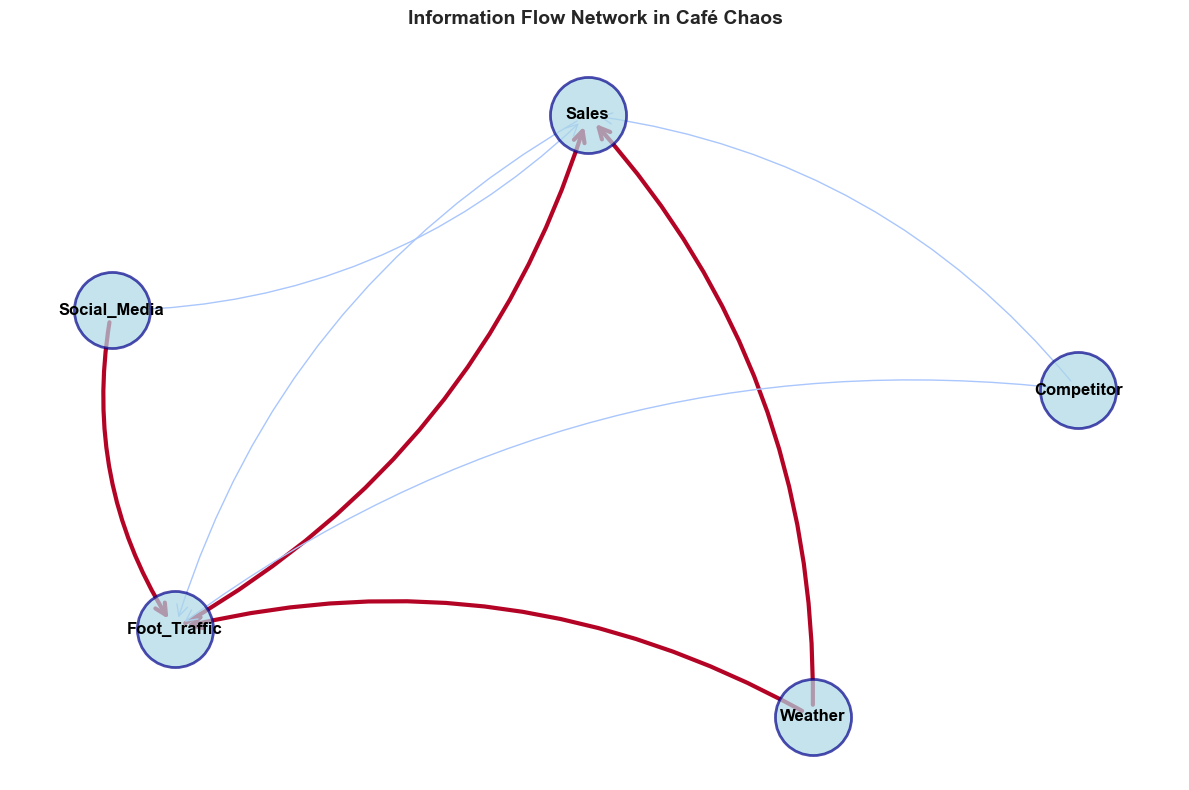

In [5]:
# Run transfer entropy analysis
variables = data.columns.tolist()
te_results = analyzer.transfer_entropy_analysis(data, variables=variables)

# Create a DataFrame for better viewing
te_df = pd.DataFrame([
    {'Source': edge.split(' → ')[0],
     'Target': edge.split(' → ')[1],
     'TE': value}
    for edge, value in te_results.items()
])

# Sort by strength of information flow
te_df = te_df.sort_values('TE', ascending=False)

print("Information Flow Analysis:")
print(te_df)

# Create an improved network visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
G = nx.DiGraph()

# Add nodes
for var in variables:
    G.add_node(var)

# Add edges with weights
max_te = te_df['TE'].max()
edge_colors = []
edge_widths = []

for _, row in te_df.iterrows():
    if row['TE'] > max_te * 0.1:  # Only show stronger connections
        G.add_edge(row['Source'], row['Target'], weight=row['TE'])
        # Calculate edge color based on strength (blue to red)
        color_val = row['TE'] / max_te
        edge_colors.append(plt.cm.coolwarm(color_val))
        edge_widths.append(3 * row['TE'] / max_te)

# Improve layout with more space between nodes
pos = nx.spring_layout(G, k=3, iterations=50)

# Draw edges with varying thickness and colors
nx.draw_networkx_edges(G, pos, 
                      width=edge_widths,
                      edge_color=edge_colors,
                      arrows=True,
                      arrowsize=20,
                      arrowstyle='->',
                      connectionstyle='arc3, rad=0.2')  # Curved edges

# Draw nodes with improved style
nx.draw_networkx_nodes(G, pos,
                      node_color='lightblue',
                      node_size=3000,
                      alpha=0.7,
                      edgecolors='darkblue',
                      linewidths=2)

# Improve label placement
nx.draw_networkx_labels(G, pos,
                       font_size=12,
                       font_weight='bold')

plt.title('Information Flow Network in Café Chaos', 
         fontsize=14, 
         pad=20,
         fontweight='bold')

plt.axis('off')
plt.tight_layout()
plt.show()

## The Grand Revelation

"This network is amazing," Mira beams, gesturing at the visualization. "It's like seeing the whole café ecosystem at once!"

"Like our drink menu board?" Max asks, squinting at the diagram.

"Better! Remember how IV and DML were like measuring individual ingredients? This is like seeing the entire recipe flow. Look at these thick red arrows - they show information moving through your café like espresso through a portafilter."

"The strongest flows are all pointing to foot traffic," Jazz notices, wiping down the steam wand. "Everything's connected to it, like all drinks starting with good beans."

"Exactly! We have three distinct flow strengths, like your drink sizes:
- Grande flows (TE ≈ 0.67): Everything strongly predicts foot traffic
- Medio flows (TE ≈ 0.22): Multiple paths to sales
- Piccolo flows (TE ≈ 0.03 and 0.01): Weather feedback and competitor effects"

Max frowns. "But earlier, you showed me how the competitor was our biggest problem?"

"Ah," Mira grins, "that's where it gets interesting. DML showed us the strength of effects - like measuring how much each ingredient affects taste. But Transfer Entropy shows us the flow of information - like understanding how heat moves through your espresso machine."

"Look," she continues, pointing to the diagram. "Weather doesn't just affect you directly - it creates a cascade, like how steaming milk changes both temperature and texture. Your competitor responds to these same patterns, but much more weakly - see those thin blue lines?"

"Like how chain cafés can't adjust their recipes quickly?" Jazz asks, expertly pouring a rosetta.

"Precisely! That's your advantage. While they're stuck with fixed responses, you can use this information flow to anticipate and adapt. Every morning, check the weather and you'll know not just today's pattern, but tomorrow's too!"

"So we're not just measuring ingredients anymore," Max realizes, "we're understanding the whole coffee-making process?"

"And that," Mira smiles, "is why Transfer Entropy completes our analysis. It shows us not just what's connected, but how everything flows together - like the perfect pour over."

"Maybe," Jazz admits, admiring their latest latte art, "there is something to this data science after all."

## The Action Plan

*"Based on what we've learned," Mira says, pulling up the network diagram, "here's how we can use these information flows strategically:"*

*"First, remember how DML showed us the competitor's big negative impact? Well, Transfer Entropy reveals something fascinating - they're actually slow to adapt! See that tiny 0.01 flow? That's your opportunity right there."*

*"Like when a chain café can't change their winter menu even when there's a heat wave?"* Jazz asks.

*"Exactly! And look at these strong flows to foot traffic - everything feeds into it. That means we can predict it from multiple angles:"*

- **Weather signals** (starting 24 hours ahead)
- **Social media engagement**
- **Even your own sales patterns**

*"So what's our actual game plan?"* Max asks, already reaching for their notebook.

Mira takes another sip of her latte. *"Here's how we combine all our insights:"*

#### **Weather Strategy (TE = 0.67, Direct Effect = -36)**
- Use the early warning from information flow
- Counter the negative impact we measured
- Double down on cozy offerings during cold spells

#### **Competitor Response (TE = 0.01, Impact = -45)**
- Their biggest impact comes with slow adaptation
- Use your flexibility when they can't respond
- Especially during weather transitions

#### **Social Media Timing (TE = 0.22, Effect = +3.5)**
- Small but steady positive impact
- Amplify during key weather transitions
- Build momentum before competitor responses

Max watches the morning crowd flow in, following patterns they can now predict. *"It's like having a weather forecast for business."*

*"Better,"* Mira grins. *"It's like having the whole recipe book of how your café works. The correlations were just the ingredients list. Causality showed us the basic steps. But this? This shows us the whole dance."*

*"Speaking of dance,"* Jazz calls from behind the counter, *"incoming rain shower in 3... 2... 1..."*

Right on cue, the first drops hit the window, and Max smiles, already knowing exactly how their day will unfold...


## Epilogue

As rain begins to fall outside *Café Chaos*, Max looks at their newly organized schedule - adjusted for weather patterns, competitor behavior, and optimal social media timing. The mystery of their sales patterns wasn't just solved - it was transformed into a strategic advantage.

"You know what the best part is?" Mira says, sipping her perfectly timed latte. "We didn't just find correlations, or even single cause-and-effect relationships. We uncovered the whole dynamic story of how your café works."

"Like a well-choreographed coffee dance," Jazz adds, putting the finishing touches on another masterpiece.

"Exactly," Mira nods. "And now that we understand the dance..."

"We can lead it," Max finishes, watching the first customers of the day come in from the rain, right on schedule.

![Anime Scene 4](anime/D_anim/d_main.png)

---

**The End**

*(Or is it? After all, in the world of data and coffee, there's always another mystery brewing...)*